In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [23]:
df = pd.read_csv('../inputs/datasets/raw/fraud_detection_dataset.csv')
df.shape


(51000, 12)

In [4]:
def fill_na_location(row):
    return 'Unknown' if row['Location'] is pd.NA else row['Location']

df['Location'] = df.apply(fill_na_location, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [5]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical.dtypes

User_ID                               int64
Transaction_Amount                  float64
Time_of_Transaction                 float64
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Fraudulent                            int64
dtype: object

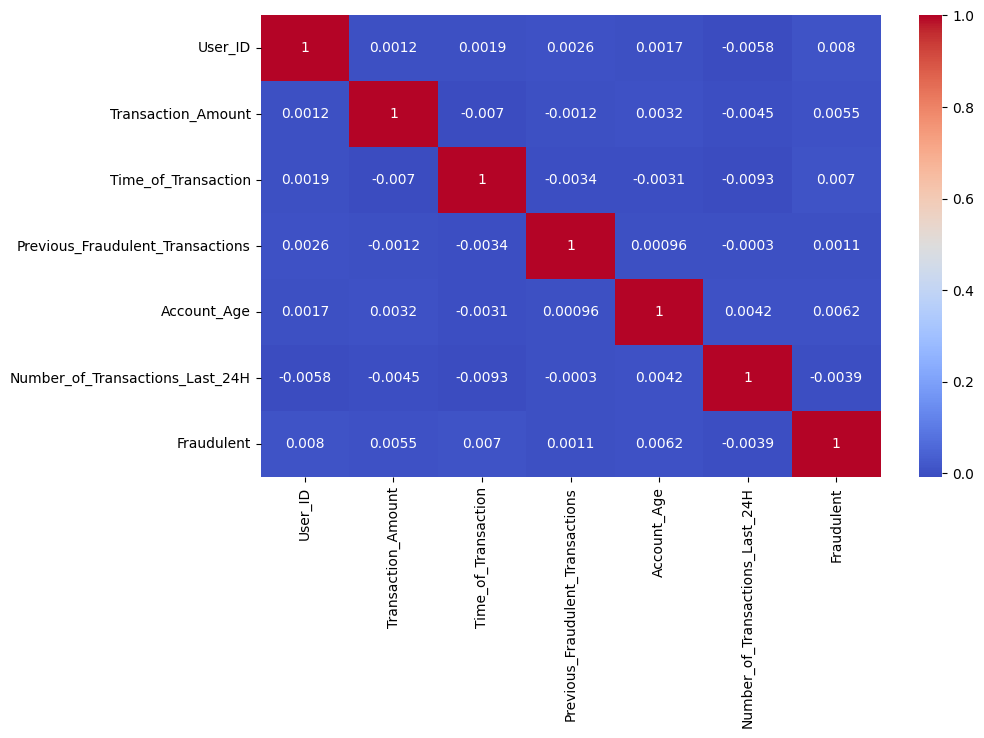

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerical.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

In [7]:
df.groupby(by=['Location'])['Time_of_Transaction'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Boston,5839.0,11.440144,6.943846,0.0,5.0,11.0,17.0,23.0
Chicago,5751.0,11.668753,6.862044,0.0,6.0,12.0,18.0,23.0
Houston,5738.0,11.534681,6.929657,0.0,5.0,12.0,18.0,23.0
Los Angeles,5727.0,11.392003,6.910371,0.0,5.0,11.0,17.0,23.0
Miami,5673.0,11.439626,6.883137,0.0,6.0,11.0,18.0,23.0
New York,5815.0,11.627343,6.918160,0.0,6.0,12.0,18.0,23.0
San Francisco,5669.0,11.504322,6.914147,0.0,6.0,12.0,18.0,23.0
Seattle,5818.0,11.330354,6.970567,0.0,5.0,11.0,17.0,23.0


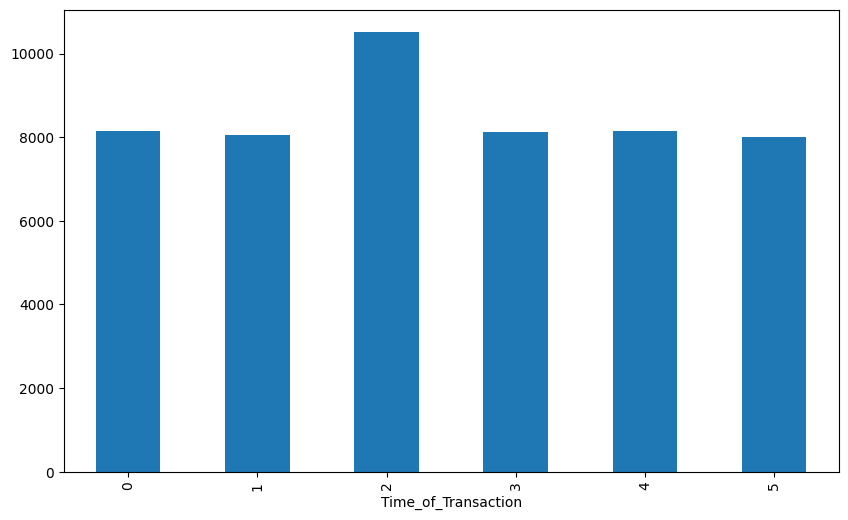

/tmp/ipykernel_164629/2978542138.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


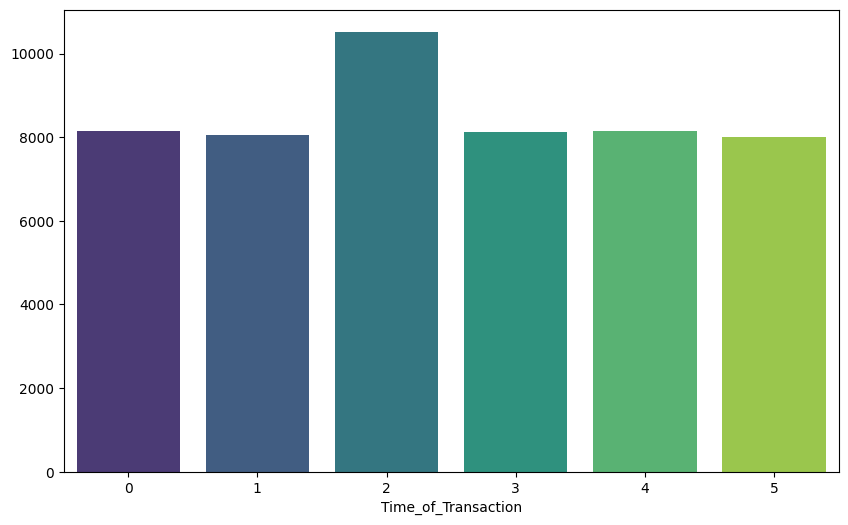

In [12]:
from feature_engine.discretisation import EqualWidthDiscretiser

pipeline = Pipeline([
    ('ewd', EqualWidthDiscretiser(bins=6, variables=['Time_of_Transaction']))
])

df['Time_of_Transaction'] = df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].mean())

df_transformed = pipeline.fit_transform(df)
value_counts = df_transformed['Time_of_Transaction'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.show()

In [24]:
df[df.duplicated(subset=['Transaction_ID'], keep=False)]
print(df.shape)

df_deduplicated = df.drop_duplicates(subset='Transaction_ID')
df_deduplicated.shape


(51000, 12)


(50000, 12)